In [2]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

config_path = '/home/werverton/Humanoid/rico/config.json'

In [3]:
config_path

'/home/werverton/Humanoid/rico/config.json'

In [12]:
def collect_gesture_periods(trace_path, config_json):
    gestures_path = os.path.join(trace_path, "gestures.json")
    with open(gestures_path, "r") as gestures_file:
        gestures = json.load(gestures_file)
    return [len(gestures[x]) for x in gestures]

def collect_gesture_sizes(trace_path, config_json):
    gestures_path = os.path.join(trace_path, "gestures.json")
    downscale_dim = config_json["downscale_dim"]

    with open(gestures_path, "r") as gestures_file:
        gestures = json.load(gestures_file)
    size_list = []
    for gesture in gestures.values():
        if len(gesture) == 1:
            size_list.append(0)
        elif len(gesture) >= 2:
            size_list.append(int(np.sqrt(((gesture[0][0] - gesture[-1][0]) * downscale_dim[0]) ** 2 + \
                                         ((gesture[0][1] - gesture[-1][1]) * downscale_dim[1]) ** 2)))
    return size_list

def plot_xy(xy_array, xlabel, xlim_up):
    x = [x[0] for x in xy_array]
    y = [y[1] for y in xy_array]

    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.xlim(0, xlim_up)
    # plt.ylim(0, 1.0)
    # plt.margins(0.01, 0.01)
    # plt.tight_layout()
    plt.show()

def run(config_path):
    with open(config_path, "r") as config_file:
        config_json = json.load(config_file)

    filtered_traces_dir = config_json["filtered_traces_path"]
    gesture_period_distribution = {}
    gesture_size_distribution = {}

    apps = next(os.walk(filtered_traces_dir))[1]
    for app in apps:
        print(app)
        app_dir = os.path.join(filtered_traces_dir, app)
        app_trace_dirs = [os.path.join(app_dir, x)
                          for x in next(os.walk(app_dir))[1]]
        for app_trace_dir in app_trace_dirs:
            gesture_periods = collect_gesture_periods(app_trace_dir, config_json)
            for gesture_period in gesture_periods:
                if gesture_period not in gesture_period_distribution:
                    gesture_period_distribution[gesture_period] = 0
                gesture_period_distribution[gesture_period] += 1

            gesture_sizes = collect_gesture_sizes(app_trace_dir, config_json)
            for gesture_size in gesture_sizes:
                if gesture_size not in gesture_size_distribution:
                    gesture_size_distribution[gesture_size] = 0
                gesture_size_distribution[gesture_size] += 1

    gesture_period_distribution.pop(0)
    gesture_period_distribution.pop(1)
    plot_xy(sorted(gesture_period_distribution.items()), "Gesture Length Distribution", 50)
    gesture_size_distribution.pop(0)
    plot_xy(sorted(gesture_size_distribution.items()), "Gesture Size Distribution", 400)

com.freeletics.gym
com.mico.roam
jp.co.so_da.android.avatargenerator
com.onePhone
com.popularapp.sevenmins
com.robinhood.android
com.imagedrome.jihachul
com.android.app.schwarz
dating.app.chat.flirt.wgbcv
mobi.firedepartment
com.fmindia.activities
ch.search.android.search
com.tribtv.wpix2
hr.palamida
com.robisoft.volume.booster
com.goanyware.tgif
com.bestdesingns.mehandidesigns
softpulse.ipl2013
com.tiggzi.project54500
com.appgameeq.musicplayer
com.audials
info.sexkeee.currency
com.app.istirja3krtot
com.wghp.localtv
com.neulion.android.collegesports.lsu2012.free
nix.hard.nokatmotazwgen
com.sapparray.docmgr
com.banfield.bpht
com.majorityapps.espiritusanto
imoblife.stretchexercises.lite
com.schoolloop.mobileloop.app
com.google.earth
com.temperature.weather.radar
com.fourthcareer.medlist.free
com.sbardyuk.dogphotos
com.napaonline.napaknowhow
com.study.english.pronunciation
com.timespread.Timetable2
com.doublerouble.counter
com.ubercab.driver
com.taxis99
mil.army.dfas
com.wrcb.android.weat

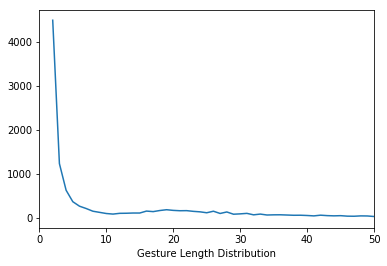

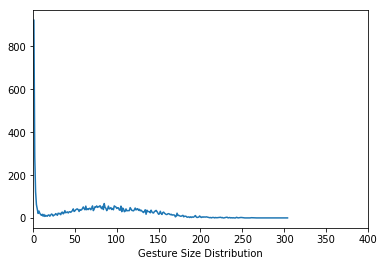

In [13]:
run(config_path)

In [15]:
def process_trace(trace_path, config_json):
    gestures_path = os.path.join(trace_path, "gestures.json")
    view_trees_dir = os.path.join(trace_path, "view_hierarchies")

    with open(gestures_path, "r") as gestures_file:
        gestures = json.load(gestures_file)

    view_tree_tags = sorted([int(x[:-len(".json")])
                             for x in next(os.walk(view_trees_dir))[2]])

    with open(gestures_path, "r") as gestures_file:
        gestures = json.load(gestures_file)
        if "" in gestures:
            gestures.pop("")
        gestures = [gestures[x] for x in sorted(gestures, key=lambda x: int(x))]
    assert(len(gestures) == len(view_tree_tags))

    # convert view tree to color rects
    view_tree_paths = [os.path.join(view_trees_dir, "%d.json" % x) for x in view_tree_tags]
    image_array = [image.convert_view_tree_file(x, config_json)
                   for x in view_tree_paths]

    # find tap inputs
    heatmap_array, interact_array = touch_input.convert_gestures(gestures, config_json)

    # find text differences pairs and insert text inputs
    # (heuristically insert them at the end of the pair)
    view_tree_paths, image_array, heatmap_array, interact_array = \
    text_input.add_text_inputs(view_tree_paths, image_array,
                               heatmap_array, interact_array, config_json)
    assert(len(view_tree_paths) == len(image_array) == len(heatmap_array) == len(interact_array))
    # filter empty states
    filtered_data = []
    for i, (image_data, heatmap_data, interact_data) in \
        enumerate(zip(image_array, heatmap_array, interact_array)):
        sum_image_data = image_data + heatmap_data
        if is_valid_data(sum_image_data, interact_data, config_json):
            # print("Interact:", interact_data)
            # print("Path:", view_tree_paths[i])
            # visualize_data(sum_image_data, config_json)

            # filtered_data.append([sum_image_data, interact_data])
            # for validation
            filtered_data.append([view_tree_paths[i], interact_data,
                                  np.unravel_index(np.argmax(heatmap_data[:,:,-1]), heatmap_data[:,:,-1].shape)])

    return filtered_data

def run(config_path):
    with open(config_path, "r") as config_file:
        config_json = json.load(config_file)

    filtered_traces_dir = config_json["filtered_traces_path"]
    output_dir = config_json["output_dir"]

    apps = next(os.walk(filtered_traces_dir))[1]
    for app in apps:
        # if app != "org.telegram.messenger":
        # if app != "com.whatsapp":
        # if app != "com.dev.newbie.comicstand":
        #     continue
        print(app)
        save_file_path = os.path.join(output_dir, "%s.pickle" % app)
        if os.path.isfile(save_file_path):
            continue

        app_dir = os.path.join(filtered_traces_dir, app)
        app_trace_dirs = [os.path.join(app_dir, x)
                          for x in next(os.walk(app_dir))[1]]
        processed_traces = {}
        for app_trace_dir in app_trace_dirs:
            processed_trace = process_trace(app_trace_dir, config_json)
            trace_num = os.path.basename(app_trace_dir)
            processed_traces[trace_num] = processed_trace

        with open(save_file_path, "wb") as f:
            pickle.dump(processed_traces, f)
        # print(sorted(processed_traces))
        # break

In [16]:
run(config_path)

com.freeletics.gym


ValueError: invalid literal for int() with base 10: '._54'

werverton
